In [1]:
import sys
sys.path.insert(1, '/home/nicolas/code/src')
sys.path.insert(1, '/home/nicolas/code/data')

import torch
from GBRBM import GBRBM
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
device = torch.device("cuda")
dtype = torch.float

In [2]:
dim = 100
Nsample = 3000
n_centers = 3
l_cube = 10
# centers = torch.rand(size = (n_centers,dim))*l_cube
centers = torch.load("../data/centers_GBRBM.pt")
# sig = torch.rand(size = (n_centers,1))*3
sig = [0.25, 0.5, 1]
sig = [1,1,1]
sample = []
for i in range(Nsample):
    k = torch.randint(0, n_centers,(1,1)).item()
    sample.append(torch.normal(mean = centers[k], std = sig[k]))
X = torch.stack(sample).T.cuda()

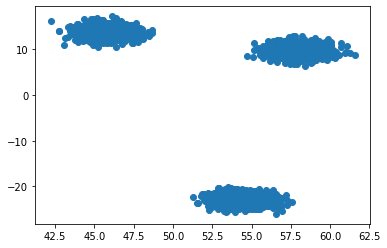

In [3]:
_,_,V = torch.svd(X.T)
proj_data = torch.mm(X.T, V).cpu()
plt.scatter(proj_data[:,0], proj_data[:,2])

In [4]:
torch.save(X, "../dataset/data_3c_samevar.pt")

In [23]:
X.shape

torch.Size([100, 3000])